# Step 1. Importing relevant libraries and enabling cache.

In [2]:
import fastf1 as f1
from fastf1 import plotting
import pandas as pd
import matplotlib.pyplot as plt

# Enabling the cache to speed up the queries.
f1.Cache.enable_cache('./f1_cache')

# Step 2. Iterating through all 2024 races. 

In [3]:
season_data = []

for round_num in range(1, 25):
    try:
        session = f1.get_session(2024, round_num, 'R')
        session.load()

        df = session.results[['DriverNumber', 'Abbreviation', 'Points', 'TeamName']]
        df['RoundNumber'] = session.event.RoundNumber
        df['EventName'] = session.event.EventName
        season_data.append(df)
    except Exception as e:
        print(f"Round {round_num} data could not be retrieved: {e}")

core           INFO 	Loading data for Bahrain Grand Prix - Race [v3.6.1]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '11', '55', '16', '63', '4', '44', '81', '14', '18', '24', '20', '3', '22', '23', '27', '31', '10', '77', '2']
/var/folders/rp/71fd1xts72s4xqq6gpvgm21c0000gn/T/ipykernel_569

# Step 3. Combining all Race Results in a DataFrame.

In [4]:
points_df = pd.concat(season_data)
points_df

,DriverNumber,Abbreviation,Points,TeamName,RoundNumber,EventName
1,1,VER,26.0,Red Bull Racing,1,Bahrain Grand Prix
11,11,PER,18.0,Red Bull Racing,1,Bahrain Grand Prix
55,55,SAI,15.0,Ferrari,1,Bahrain Grand Prix
16,16,LEC,12.0,Ferrari,1,Bahrain Grand Prix
63,63,RUS,10.0,Mercedes,1,Bahrain Grand Prix
...,...,...,...,...,...,...
20,20,MAG,0.0,Haas F1 Team,24,Abu Dhabi Grand Prix
30,30,LAW,0.0,RB,24,Abu Dhabi Grand Prix
77,77,BOT,0.0,Kick Sauber,24,Abu Dhabi Grand Prix
43,43,COL,0.0,Williams,24,Abu Dhabi Grand Prix


# Step 4. Computing cumulative points.

In [5]:
points_df = points_df.sort_values(by=['Abbreviation', 'RoundNumber'])
points_df['CumulativePoints'] = (
    points_df.groupby('Abbreviation')['Points'].cumsum()
)

points_df[['Abbreviation', 'CumulativePoints']]

,Abbreviation,CumulativePoints
23,ALB,0.0
23,ALB,0.0
23,ALB,0.0
23,ALB,0.0
23,ALB,0.0
...,...,...
24,ZHO,0.0
24,ZHO,0.0
24,ZHO,0.0
24,ZHO,4.0


# Step 5. Plotting Cumulative Points Progression.

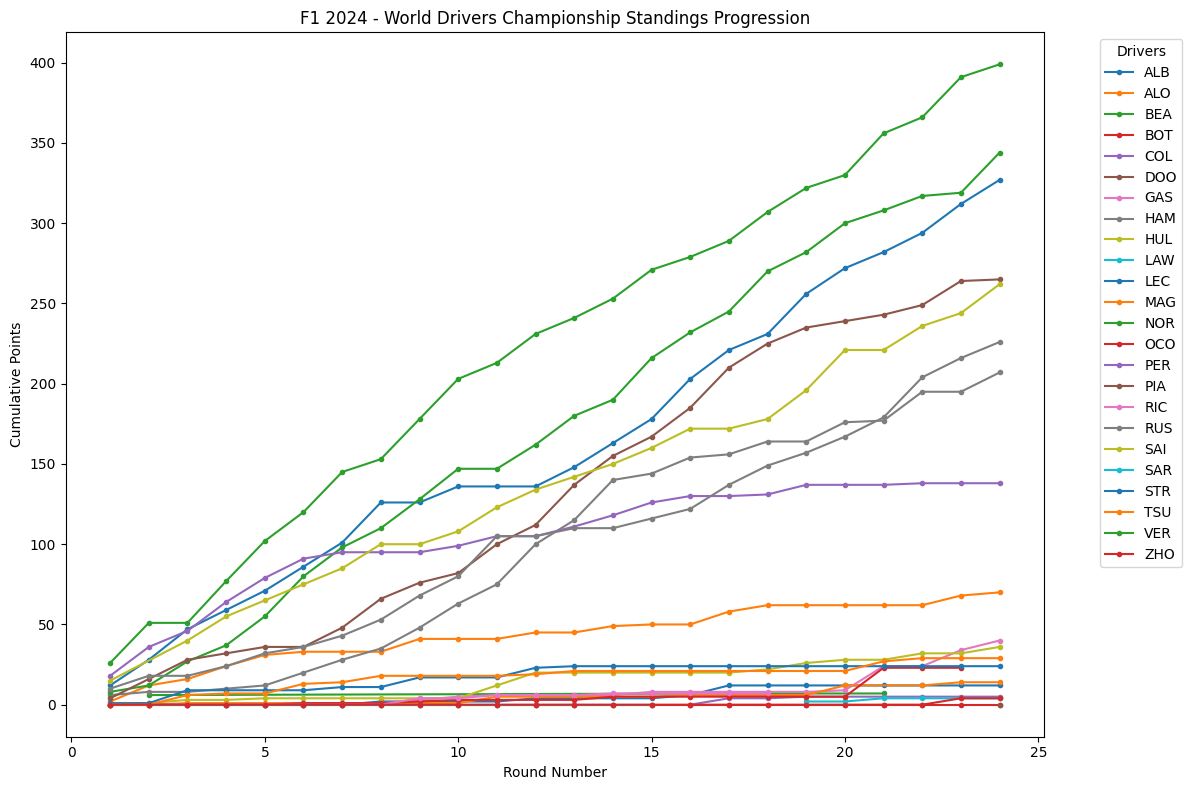

In [6]:
plt.figure(figsize=(12, 8))

for driver, df_driver in points_df.groupby('Abbreviation'):
    plt.plot(
        df_driver['RoundNumber'],
        df_driver['CumulativePoints'],
        marker='.',
        label=driver
    )

plt.xlabel('Round Number')
plt.ylabel('Cumulative Points')
plt.title('F1 2024 - World Drivers Championship Standings Progression')
plt.legend(
    title = 'Drivers', 
    bbox_to_anchor=(1.05, 1),
    loc='upper left'
)
plt.tight_layout()
plt.show()